<a href="https://colab.research.google.com/github/pritiyadav888/Machine-Learning-Projects/blob/main/YouTube_spam_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# EDA Packages
import pandas as pd
import numpy as np
# ML Packages For Vectorization of Text For Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#1.Load the data into a pandas data frame.
# Dataset from https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection#

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predictive_Data/Youtube01-Psy.csv')


Dimensions of training data: (350, 1418)
  (0, 1400)	0.21397167142374784
  (0, 1258)	0.44754357578671583
  (0, 1223)	0.18264016105736508
  (0, 924)	0.23016367977154104
  (0, 736)	0.44754357578671583
  (0, 653)	0.44754357578671583
  (0, 308)	0.20574818027767602
  (0, 306)	0.22324766889902328
  (0, 193)	0.41812173331553615
  (1, 1356)	0.2599340488555252
  (1, 1298)	0.2599340488555252
  (1, 1284)	0.19654497488145362
  (1, 1223)	0.10607770754794794
  (1, 1207)	0.29572991752621125
  (1, 1164)	0.13696512107834471
  (1, 1087)	0.2599340488555252
  (1, 968)	0.2716823851106715
  (1, 924)	0.13367944579996588
  (1, 923)	0.2015089199391452
  (1, 882)	0.16974134159323326
  (1, 870)	0.11070094887565296
  (1, 849)	0.2599340488555252
  (1, 848)	0.2599340488555252
  (1, 765)	0.14052877713504328
  (1, 760)	0.2428457940975844
  :	:
  (348, 336)	0.21446497918134305
  (348, 278)	0.22880906120419403
  (348, 199)	0.19481621228879306
  (348, 183)	0.21376698593164775
  (349, 1347)	0.21834169208155027
  (349, 1

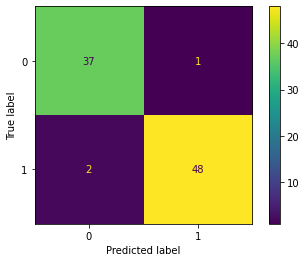

Confusion matrix

 [[37  1]
 [ 2 48]]

True Positives(TP) =  37

True Negatives(TN) =  48

False Positives(FP) =  1

False Negatives(FN) =  2


In [6]:
#2.Some basic data exploration and presentation of results
# Total Size
data.shape
data.size

# Checking for Consistent Column Name
data.columns

# Checking for Datatypes
data.dtypes

# Check for missing nan
data.isnull().isnull().sum()
# Checking for Date
data["DATE"]
data.AUTHOR

# Convert the Author Name to First Name and Last Name
df_data = data[["CONTENT","CLASS"]]

df_data.columns

df_x = df_data['CONTENT']
df_y = df_data['CLASS']


#3. Using nltk toolkit classes and methods prepared the data for model building
#Feature Extraction From Text #CountVectorizer#TfidfVectorizer

corpus = df_x
cv = CountVectorizer()
X = cv.fit_transform(corpus) # Fit the Data

X.toarray()


#4. get the feature names #.new shape of data (350, 1418)
cv.get_feature_names()
X.shape


#5.Downscale the transformed data using tf-idf 
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
x_tfidf = tfidf.fit_transform(X)
# there are 1418 different words / 1259 without stop words in the 350 video comments
print("\nDimensions of training data:", x_tfidf.shape)
print(x_tfidf)
#type-scipy.sparse.csr.csr_matrix
type(x_tfidf)
print(x_tfidf.toarray())
#.shape of data (350, 1418)
x_tfidf.shape


#6.shuffle the dataset
shuffle_dataset = df_data.sample(frac=1)


#7.Model#spliting your dataset into 75% for training and 25% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.25, random_state=42)
X_train

#8.Naive Bayes Classifier #Fit the training data 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()   
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

# Accuracy of our Model 
print("Accuracy of Model",clf.score(X_test,y_test)*100,"%")
print("Accuracy of Model",clf.score(X_train,y_train)*100,"%")

#The training-set accuracy score is 100% while the test-set accuracy to be 96%. These two values are quite comparable. So, there is sign of overfitting.
## Predicting with our model
clf.predict(X_test)

# Sample Prediciton one
comment = ["Check this out"]
vect = cv.transform(comment).toarray()
clf.predict(vect)
class_dict = {'ham':0,'spam':1}
class_dict.values()

if clf.predict(vect) == 1:
    print("Spam")
else:
    print("Ham")
    
    
#11. Sample Prediciton two #Added more comments
comment1 = ["Check this out","Great song Friend","wow this music video really express the korean culture", "*** Facebook is LAME and so 2004! Check ou...",
    "it seems like k-pop music video, too many dancers", "im selling this beautiful mercedes-benz car", "Though I do not necessarily concur with the idea in totality, I regard your point of view"]
vect = cv.transform(comment1).toarray()

predictions = clf.predict(vect)

for p in predictions:
    if p == 1:
        print("Spam")
    else:
        print("Ham")


#Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. 
#Later you can load this file to deserialize your model and use it to make new predictions

import pickle
naivebayesML = open("YtbSpam_model.pkl","wb")
pickle.dump(clf,naivebayesML)
naivebayesML.close()
# Load the model

ytb_model = open("YtbSpam_model.pkl","rb")
new_model = pickle.load(ytb_model)

new_model
# Sample Prediciton 3
comment2 = ["Hey Music Fans I really appreciate all of you,but see this song too"]
vect = cv.transform(comment2).toarray()
new_model.predict(vect)

if new_model.predict(vect) == 1:
    print("Spam")
else:
    print("Ham")


#9.Applying 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

#10.Print the Confusion Matrix and slice it into four pieces #Test the model on the test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(clf, X_test, y_test)

plt.show() 

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
#The confusion matrix shows 37 + 48 = 85 correct predictions and 1+2 = 3 incorrect predictions.
#For more commnets check above.